In [1]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt

veriler=pd.read_csv("C:\\Users\\Dell\\Desktop\\datathon2023\\train.csv")
testVerileri=pd.read_csv("C:\\Users\\Dell\\Desktop\\datathon2023\\test_x.csv")

In [2]:
x=veriler.iloc[:,1:]
xt=testVerileri.iloc[:,1:]
y=veriler.iloc[:,12:13]

In [3]:
x=pd.get_dummies(data=x,columns=["Cinsiyet","Yaş Grubu","Medeni Durum","Eğitim Düzeyi",
                               "İstihdam Durumu","Yaşadığı Şehir",
                               "En Çok İlgilendiği Ürün Grubu","Eğitime Devam Etme Durumu"
                               ],dtype=float)
xt=pd.get_dummies(data=xt,columns=["Cinsiyet","Yaş Grubu","Medeni Durum","Eğitim Düzeyi",
                               "İstihdam Durumu","Yaşadığı Şehir",
                               "En Çok İlgilendiği Ürün Grubu","Eğitime Devam Etme Durumu"
                               ],dtype=int)
y=pd.get_dummies(data=y,columns=["Öbek İsmi"],dtype=int)

In [4]:
y

,Öbek İsmi_obek_1,Öbek İsmi_obek_2,Öbek İsmi_obek_3,Öbek İsmi_obek_4,Öbek İsmi_obek_5,Öbek İsmi_obek_6,Öbek İsmi_obek_7,Öbek İsmi_obek_8
0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
5455,0,0,0,0,0,1,0,0
5456,0,0,0,0,0,1,0,0
5457,1,0,0,0,0,0,0,0
5458,0,0,0,0,0,0,0,1


In [5]:
print(x.info())
print("-------------------------------------------------------------------------------------------------------")
print(xt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 38 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Yıllık Ortalama Gelir                                           5460 non-null   float64
 1   Yıllık Ortalama Satın Alım Miktarı                              5460 non-null   float64
 2   Yıllık Ortalama Sipariş Verilen Ürün Adedi                      5460 non-null   float64
 3   Öbek İsmi                                                       5460 non-null   object 
 4   Yıllık Ortalama Sepete Atılan Ürün Adedi                        5460 non-null   float64
 5   Cinsiyet_Erkek                                                  5460 non-null   float64
 6   Cinsiyet_Kadın                                                  5460 non-null   float64
 7   Yaş Grubu_18-30                                    

In [6]:
y=y.values
x.drop("Öbek İsmi",axis=1,inplace=True)
x=x.values
xt=xt.values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import PowerTransformer
#from sklearn.preprocessing import RobustScaler
sc=StandardScaler()
x_train=sc.fit_transform(X_train)
x_test=sc.transform(X_test)
xt_test=sc.transform(xt)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping 

In [10]:
x_train.shape

(4368, 37)

In [11]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [12]:
model=Sequential()
model.add(Dense(units=37,activation="relu"))
model.add(Dense(units=37,activation="relu"))
model.add(Dense(units=18,activation="relu"))
model.add(Dense(units=18,activation="relu"))
model.add(Dense(units=8,activation="softmax"))
model.compile(loss="mean_absolute_error",optimizer="adam")

In [13]:
earlyStopping=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [14]:
model.fit(x=x_train,y=Y_train,epochs=100,validation_data=(x_test,Y_test),verbose=1,callbacks=[earlyStopping])

Epoch 1/100
137/137 [==============================] - 2s 4ms/step - loss: 0.1645 - val_loss: 0.1014
Epoch 2/100
137/137 [==============================] - 0s 3ms/step - loss: 0.0697 - val_loss: 0.0348
Epoch 3/100
137/137 [==============================] - 0s 3ms/step - loss: 0.0261 - val_loss: 0.0210
Epoch 4/100
137/137 [==============================] - 0s 3ms/step - loss: 0.0185 - val_loss: 0.0178
Epoch 5/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0154 - val_loss: 0.0162
Epoch 6/100
137/137 [==============================] - 0s 3ms/step - loss: 0.0142 - val_loss: 0.0153
Epoch 7/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.0144
Epoch 8/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0125 - val_loss: 0.0143
Epoch 9/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0123 - val_loss: 0.0139
Epoch 10/100
137/137 [==============================] - 0s 3ms/step - loss: 0.0121 - val_lo

In [15]:
#model.history.history

<Axes: >

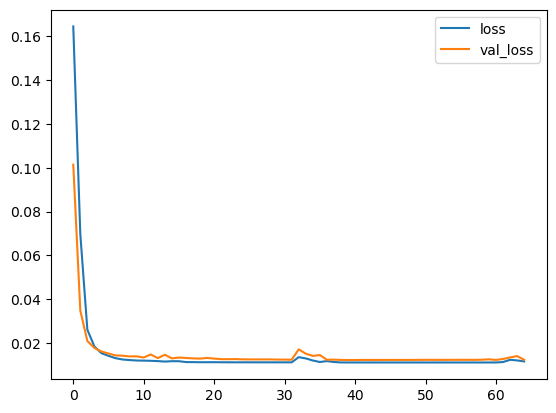

In [16]:
modelKaybi=pd.DataFrame(model.history.history)
modelKaybi.plot()

In [17]:
from keras import backend
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

tahminlerimiz=model.predict(x_test)

tahmin=[]
for i in tahminlerimiz:    
    tahmin.append(backend.eval(tf.math.argmax(i)))

test=[]
for i in Y_test:    
    test.append(backend.eval(tf.math.argmax(i)))

cm=confusion_matrix(test,tahmin)
print(cm)
acc=accuracy_score(test,tahmin)
print(acc)

35/35 [==============================] - 0s 1ms/step
[[122   0   3   3   0   0   0   1]
 [  1 105   0   0   0   2   3   1]
 [  2   0 119   0   1   3   1   0]
 [  1   2   1 141   2   1   0   2]
 [  2   2   0   0 134   0   1   1]
 [  2   1   0   0   2 138   1   0]
 [  1   1   2   1   2   0 146   0]
 [  0   1   0   1   2   1   0 133]]
0.9505494505494505
